In [19]:
import numpy as np 
import keras 
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

10000


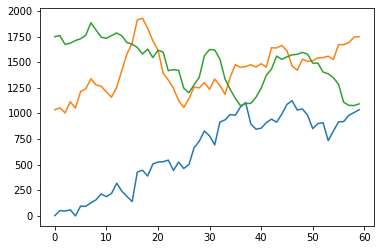

[1. 0. 0.]
10000 8000 2000 60


In [20]:
str0 = "ts_L60_Z12_A500_DX50_bias5_N10000"
fnamex = "DATA/x_" + str0 + ".csv"
fnamey = "DATA/y_" + str0 + ".csv"

x = np.loadtxt(fnamex, delimiter = ",", dtype=float)
N = len(x)
print(N)

plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

# these categories are going to the matrix useful for categorical cross entropy
categ = np.loadtxt(fnamey, delimiter=",", dtype=int)
N_categ = 3
y = np.zeros((N,N_categ))
for n in range(N):
    y[n][categ[n]] = 1
print(y[0])

perc_train = 0.8
N_train = int(N * perc_train)
N_val = N - N_train

x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

## Data reshaping

In [12]:
x_train = x_train.reshape(x_train.shape[0],L,1)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

## Convolutional NN

In [13]:
from keras import initializers, regularizers
reg = regularizers.l1(0.001) # for the lambda in lasso regularization
np.random.seed(12345)
# it draws from a normal distribution
ini = initializers.RandomNormal(mean=0, stddev= 0.05)

model = Sequential()
model.add(Conv1D(filters=5, kernel_size=11,
          kernel_regularizer = reg,
          kernel_initializer = ini,
          activation = "relu",
          input_shape = input_shape
          ))

model.add(AveragePooling1D(5))
model.add(Conv1D(filters=5, kernel_size=7, activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="softmax"))

print(model.summary())

from keras import optimizers
opt = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True, decay=1e-6)

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [14]:
batch_size = 250
epochs = 10
# reducing the number of epochs we see that the model is not going well now

fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val), verbose=2, shuffle=True)

Epoch 1/10
32/32 - 1s - loss: 888.5020 - accuracy: 0.3347 - val_loss: 1.0999 - val_accuracy: 0.3335
Epoch 2/10
32/32 - 0s - loss: 1.0998 - accuracy: 0.3321 - val_loss: 1.0995 - val_accuracy: 0.3335
Epoch 3/10
32/32 - 0s - loss: 32.8733 - accuracy: 0.3345 - val_loss: 12.9800 - val_accuracy: 0.3335
Epoch 4/10
32/32 - 0s - loss: 1.2545 - accuracy: 0.3288 - val_loss: 1.0997 - val_accuracy: 0.3335
Epoch 5/10
32/32 - 0s - loss: 1.0998 - accuracy: 0.3336 - val_loss: 1.0997 - val_accuracy: 0.3335
Epoch 6/10
32/32 - 0s - loss: 1.0998 - accuracy: 0.3207 - val_loss: 1.0996 - val_accuracy: 0.3335
Epoch 7/10
32/32 - 0s - loss: 1.0998 - accuracy: 0.3315 - val_loss: 1.0996 - val_accuracy: 0.3335
Epoch 8/10
32/32 - 0s - loss: 1.0997 - accuracy: 0.3288 - val_loss: 1.0996 - val_accuracy: 0.3335
Epoch 9/10
32/32 - 0s - loss: 1.0997 - accuracy: 0.3325 - val_loss: 1.0996 - val_accuracy: 0.3335
Epoch 10/10
32/32 - 0s - loss: 1.0997 - accuracy: 0.3305 - val_loss: 1.0996 - val_accuracy: 0.3335


### Why is it not working?

Here since data is not sampled with average zero our model is not even converging. We decide then to remove the average frome our x_train samples.

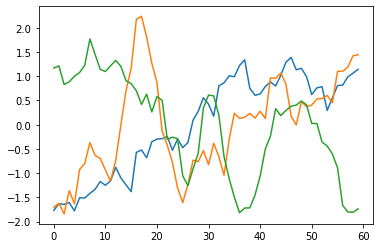

In [15]:
xm = x.mean(axis = 1) # da cambiare perchè non mi piace come lo fa lui 
for n in range(N):
    x[n] = x[n] - xm[n]

std = x.std(axis=1)
for n in range(N):
    x[n] = x[n] / std[n]
    
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

# infact the orange one wad the traj with y = 1 and it has a big bump, instead the green one has the same bumb but with opposite convexity in coherently with its label. These labels shouyld be recognised by the CNN

In [16]:
batch_size = 250
epochs = 250
# reducing the number of epochs we see that the model is not going well now

fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val), verbose=2, shuffle=True)

0.6329 - val_loss: 0.8139 - val_accuracy: 0.6465
Epoch 53/250
32/32 - 0s - loss: 0.8261 - accuracy: 0.6304 - val_loss: 0.8101 - val_accuracy: 0.6485
Epoch 54/250
32/32 - 0s - loss: 0.8172 - accuracy: 0.6330 - val_loss: 0.8078 - val_accuracy: 0.6480
Epoch 55/250
32/32 - 0s - loss: 0.8174 - accuracy: 0.6327 - val_loss: 0.8088 - val_accuracy: 0.6480
Epoch 56/250
32/32 - 0s - loss: 0.8157 - accuracy: 0.6336 - val_loss: 0.8068 - val_accuracy: 0.6520
Epoch 57/250
32/32 - 0s - loss: 0.8101 - accuracy: 0.6419 - val_loss: 0.8055 - val_accuracy: 0.6520
Epoch 58/250
32/32 - 0s - loss: 0.8113 - accuracy: 0.6363 - val_loss: 0.8031 - val_accuracy: 0.6540
Epoch 59/250
32/32 - 0s - loss: 0.8069 - accuracy: 0.6414 - val_loss: 0.8017 - val_accuracy: 0.6565
Epoch 60/250
32/32 - 0s - loss: 0.8067 - accuracy: 0.6492 - val_loss: 0.7987 - val_accuracy: 0.6560
Epoch 61/250
32/32 - 0s - loss: 0.8049 - accuracy: 0.6396 - val_loss: 0.8031 - val_accuracy: 0.6525
Epoch 62/250
32/32 - 0s - loss: 0.8022 - accuracy: 

63/63 [==============================] - 0s 772us/step - loss: 0.6916 - accuracy: 0.7045

Test loss: 0.6916019916534424
Test accuracy: 0.7045000195503235


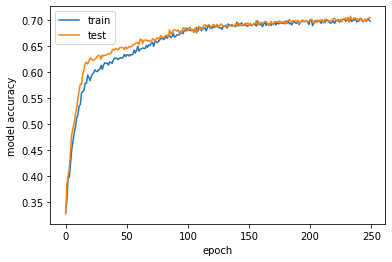

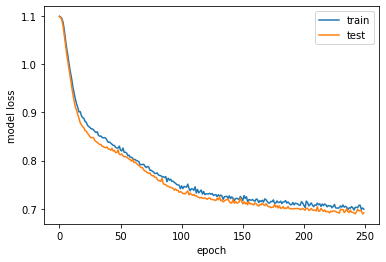

In [18]:
#Plot the results

score = model.evaluate(x_val, y_val, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# look into training history

# summarize history for accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()